# Geospatial Data Analytics with Python - Example 1-2: Earthquakes in Afghanistan (Continued)
___

In [61]:
# Libraries Import
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## G) Nearest Neighbour Analysis (NNA)

In [23]:
# Section 1: Basemap (Afghanistan)
countries = gpd.read_file('/IT Training/DatasetsForLearning/GSDA/countries.shp')
afg = countries[countries["NAME"] == "Afghanistan"]

In [24]:
# Section 2: Earthquakes Coordinates (Afghanistan)
# afgeq = gpd.read_file('gsdap1-1.shp', mask = eq[eq["Country"] == "Afghanistan"])
eq = gpd.read_file('gsdap1-1.shp')
afgeq = eq[eq["Country"] == "Afghanistan"]

In [34]:
# Section 3: Cities Coordinates (Afghanistan) + Capital Coorindates (Afghanistan)
afgc = gpd.read_file('afgc.shp')
kabul = gpd.read_file('kabul.shp')

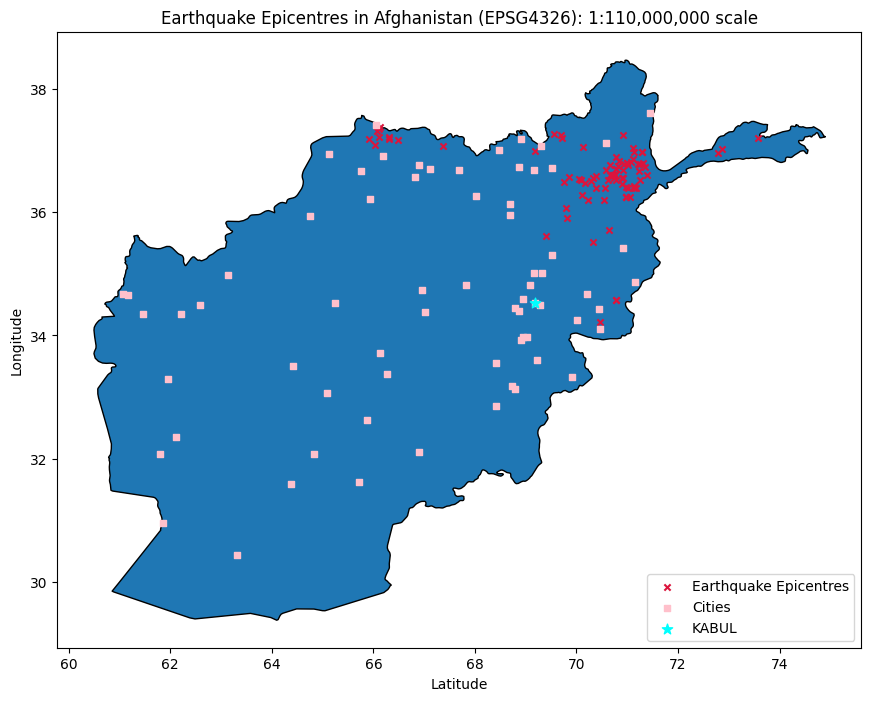

In [52]:
# Reference: See Section C
# Overlay: Basemap + Earthquake Epicentres + Cities + Capital
fig, ax = plt.subplots(figsize=(12,8))
afg.plot(ax=ax, edgecolor='black')
afgeq.plot(ax=ax, color='crimson', marker='x', markersize=20, label='Earthquake Epicentres')
afgc.plot(ax=ax, color='pink', marker='s', markersize=20, label='Cities')
kabul.plot(ax=ax, color='cyan',  marker='*', markersize=60, label='KABUL')
plt.title('Earthquake Epicentres in Afghanistan (EPSG4326): 1:110,000,000 scale')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc=4)

In [62]:
# Import relevant functions for NNA
from shapely.ops import nearest_points
from shapely.geometry import LineString

In [57]:
afgc.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
0,Kabul,Kabul,34.5253,69.1783,Afghanistan,AF,AFG,K?bul,primary,4273156.0,1004993580,POINT (69.17830 34.52530)
1,Kandah?r,Kandahar,31.6200,65.7158,Afghanistan,AF,AFG,Kandah?r,admin,614254.0,1004003059,POINT (65.71580 31.62000)
2,Her?t,Herat,34.3419,62.2031,Afghanistan,AF,AFG,Her?t,admin,556205.0,1004237782,POINT (62.20310 34.34190)
3,Far?h,Farah,32.3436,62.1194,Afghanistan,AF,AFG,Far?h,admin,500000.0,1004523791,POINT (62.11940 32.34360)
4,Maz?r-e Shar?f,Mazar-e Sharif,36.7000,67.1167,Afghanistan,AF,AFG,Balkh,admin,469247.0,1004436363,POINT (67.11670 36.70000)


In [58]:
afgeq.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Country,geometry
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan,POINT (71.31000 36.80000)
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan,POINT (71.11000 37.04000)
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan,POINT (71.13000 36.43000)
5,2023-05-24,08:18:08,36.40,71.13,140.0,4.2,Afghanistan,POINT (71.13000 36.40000)
6,2023-05-23,08:45:41,36.87,71.12,195.0,4.1,Afghanistan,POINT (71.12000 36.87000)


In [87]:
# Create a function to calculate the nearest distances between earthquake epicentres and cities
def n(row, d, val="geometry", col="geometry"):
    union = d["geometry"].unary_union #Create a multipoint object
    nearest = nearest_points(row[col], union) #Find the closest geometry
    match_geom = d.loc[d["geometry"] == nearest[1]] #Get the corresponding values
    match_value = match_geom[val].to_numpy()[0]
    return match_value

# The .apply() method to pass the arguments into the function.
afgeq["nearest_geom"] = afgeq.apply(n, d=afgc, val="geometry", axis=1)
afgeq["nearest_city"] = afgeq.apply(n, d=afgc, val="city_ascii", axis=1)

afgeq.head()

c:\Users\likre\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\likre\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Date,Time,Latitude,Longitude,Depth,Magnitude,Country,geometry,nearest_city,nearest_geom
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan,POINT (71.31000 36.80000),Faizabad,POINT (70.58000 37.11660)
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan,POINT (71.11000 37.04000),Faizabad,POINT (70.58000 37.11660)
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan,POINT (71.13000 36.43000),Faizabad,POINT (70.58000 37.11660)
5,2023-05-24,08:18:08,36.40,71.13,140.0,4.2,Afghanistan,POINT (71.13000 36.40000),Faizabad,POINT (70.58000 37.11660)
6,2023-05-23,08:45:41,36.87,71.12,195.0,4.1,Afghanistan,POINT (71.12000 36.87000),Faizabad,POINT (70.58000 37.11660)


In [88]:
# Connecting the epicentres to closest cities via a line: LineString
afgeq['line'] = afgeq.apply(lambda row: LineString([row['geometry'], row['nearest_geom']]), axis=1)
afgeq.head()

c:\Users\likre\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Date,Time,Latitude,Longitude,Depth,Magnitude,Country,geometry,nearest_city,nearest_geom,line
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan,POINT (71.31000 36.80000),Faizabad,POINT (70.58000 37.11660),"LINESTRING (71.31000 36.80000, 70.58000 37.11660)"
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan,POINT (71.11000 37.04000),Faizabad,POINT (70.58000 37.11660),"LINESTRING (71.11000 37.04000, 70.58000 37.11660)"
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan,POINT (71.13000 36.43000),Faizabad,POINT (70.58000 37.11660),"LINESTRING (71.13000 36.43000, 70.58000 37.11660)"
5,2023-05-24,08:18:08,36.40,71.13,140.0,4.2,Afghanistan,POINT (71.13000 36.40000),Faizabad,POINT (70.58000 37.11660),"LINESTRING (71.13000 36.40000, 70.58000 37.11660)"
6,2023-05-23,08:45:41,36.87,71.12,195.0,4.1,Afghanistan,POINT (71.12000 36.87000),Faizabad,POINT (70.58000 37.11660),"LINESTRING (71.12000 36.87000, 70.58000 37.11660)"


In [75]:
# Set the geometry of the Geodataframe to the LineString geometry
link = afgeq[["Date", "nearest_city", "line"]].set_geometry('line')
link.crs = crs = 'epsg:4326'

afgeq.drop(["nearest_geom", "line"], axis=1, inplace=True)
afgeq.head()

C:\Users\likre\AppData\Local\Temp\ipykernel_35268\3458746845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afgeq.drop(["nearest_geom", "line"], axis=1, inplace=True)


,Date,Time,Latitude,Longitude,Depth,Magnitude,Country,geometry,nearest_city
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan,POINT (71.31000 36.80000),Faizabad
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan,POINT (71.11000 37.04000),Faizabad
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan,POINT (71.13000 36.43000),Faizabad
5,2023-05-24,08:18:08,36.40,71.13,140.0,4.2,Afghanistan,POINT (71.13000 36.40000),Faizabad
6,2023-05-23,08:45:41,36.87,71.12,195.0,4.1,Afghanistan,POINT (71.12000 36.87000),Faizabad


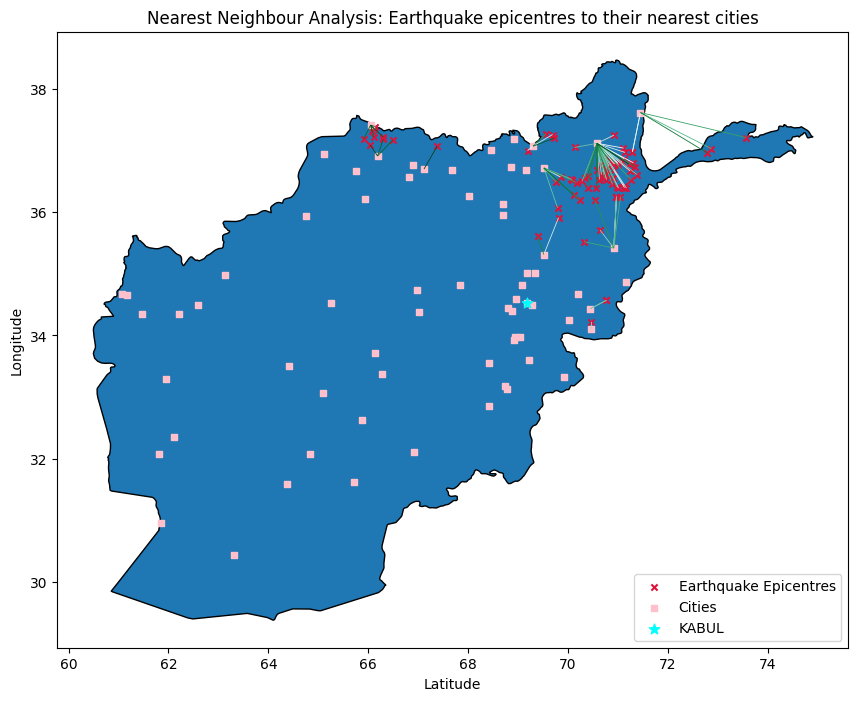

In [83]:
# NNA Overlay
fig, ax = plt.subplots(figsize=(12,8))
afg.plot(ax=ax, edgecolor='black')
afgeq.plot(ax=ax, color='crimson', marker='x', markersize=20, label='Earthquake Epicentres')
afgc.plot(ax=ax, color='pink', marker='s', markersize=20, label='Cities')
kabul.plot(ax=ax, color='cyan',  marker='*', markersize=60, label='KABUL')
link.plot(ax=ax, linewidth=0.6, cmap='BuGn')
plt.title('Nearest Neighbour Analysis: Earthquake epicentres to their nearest cities')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc=4)

___
**END**